# Titanic Survival Predictions 

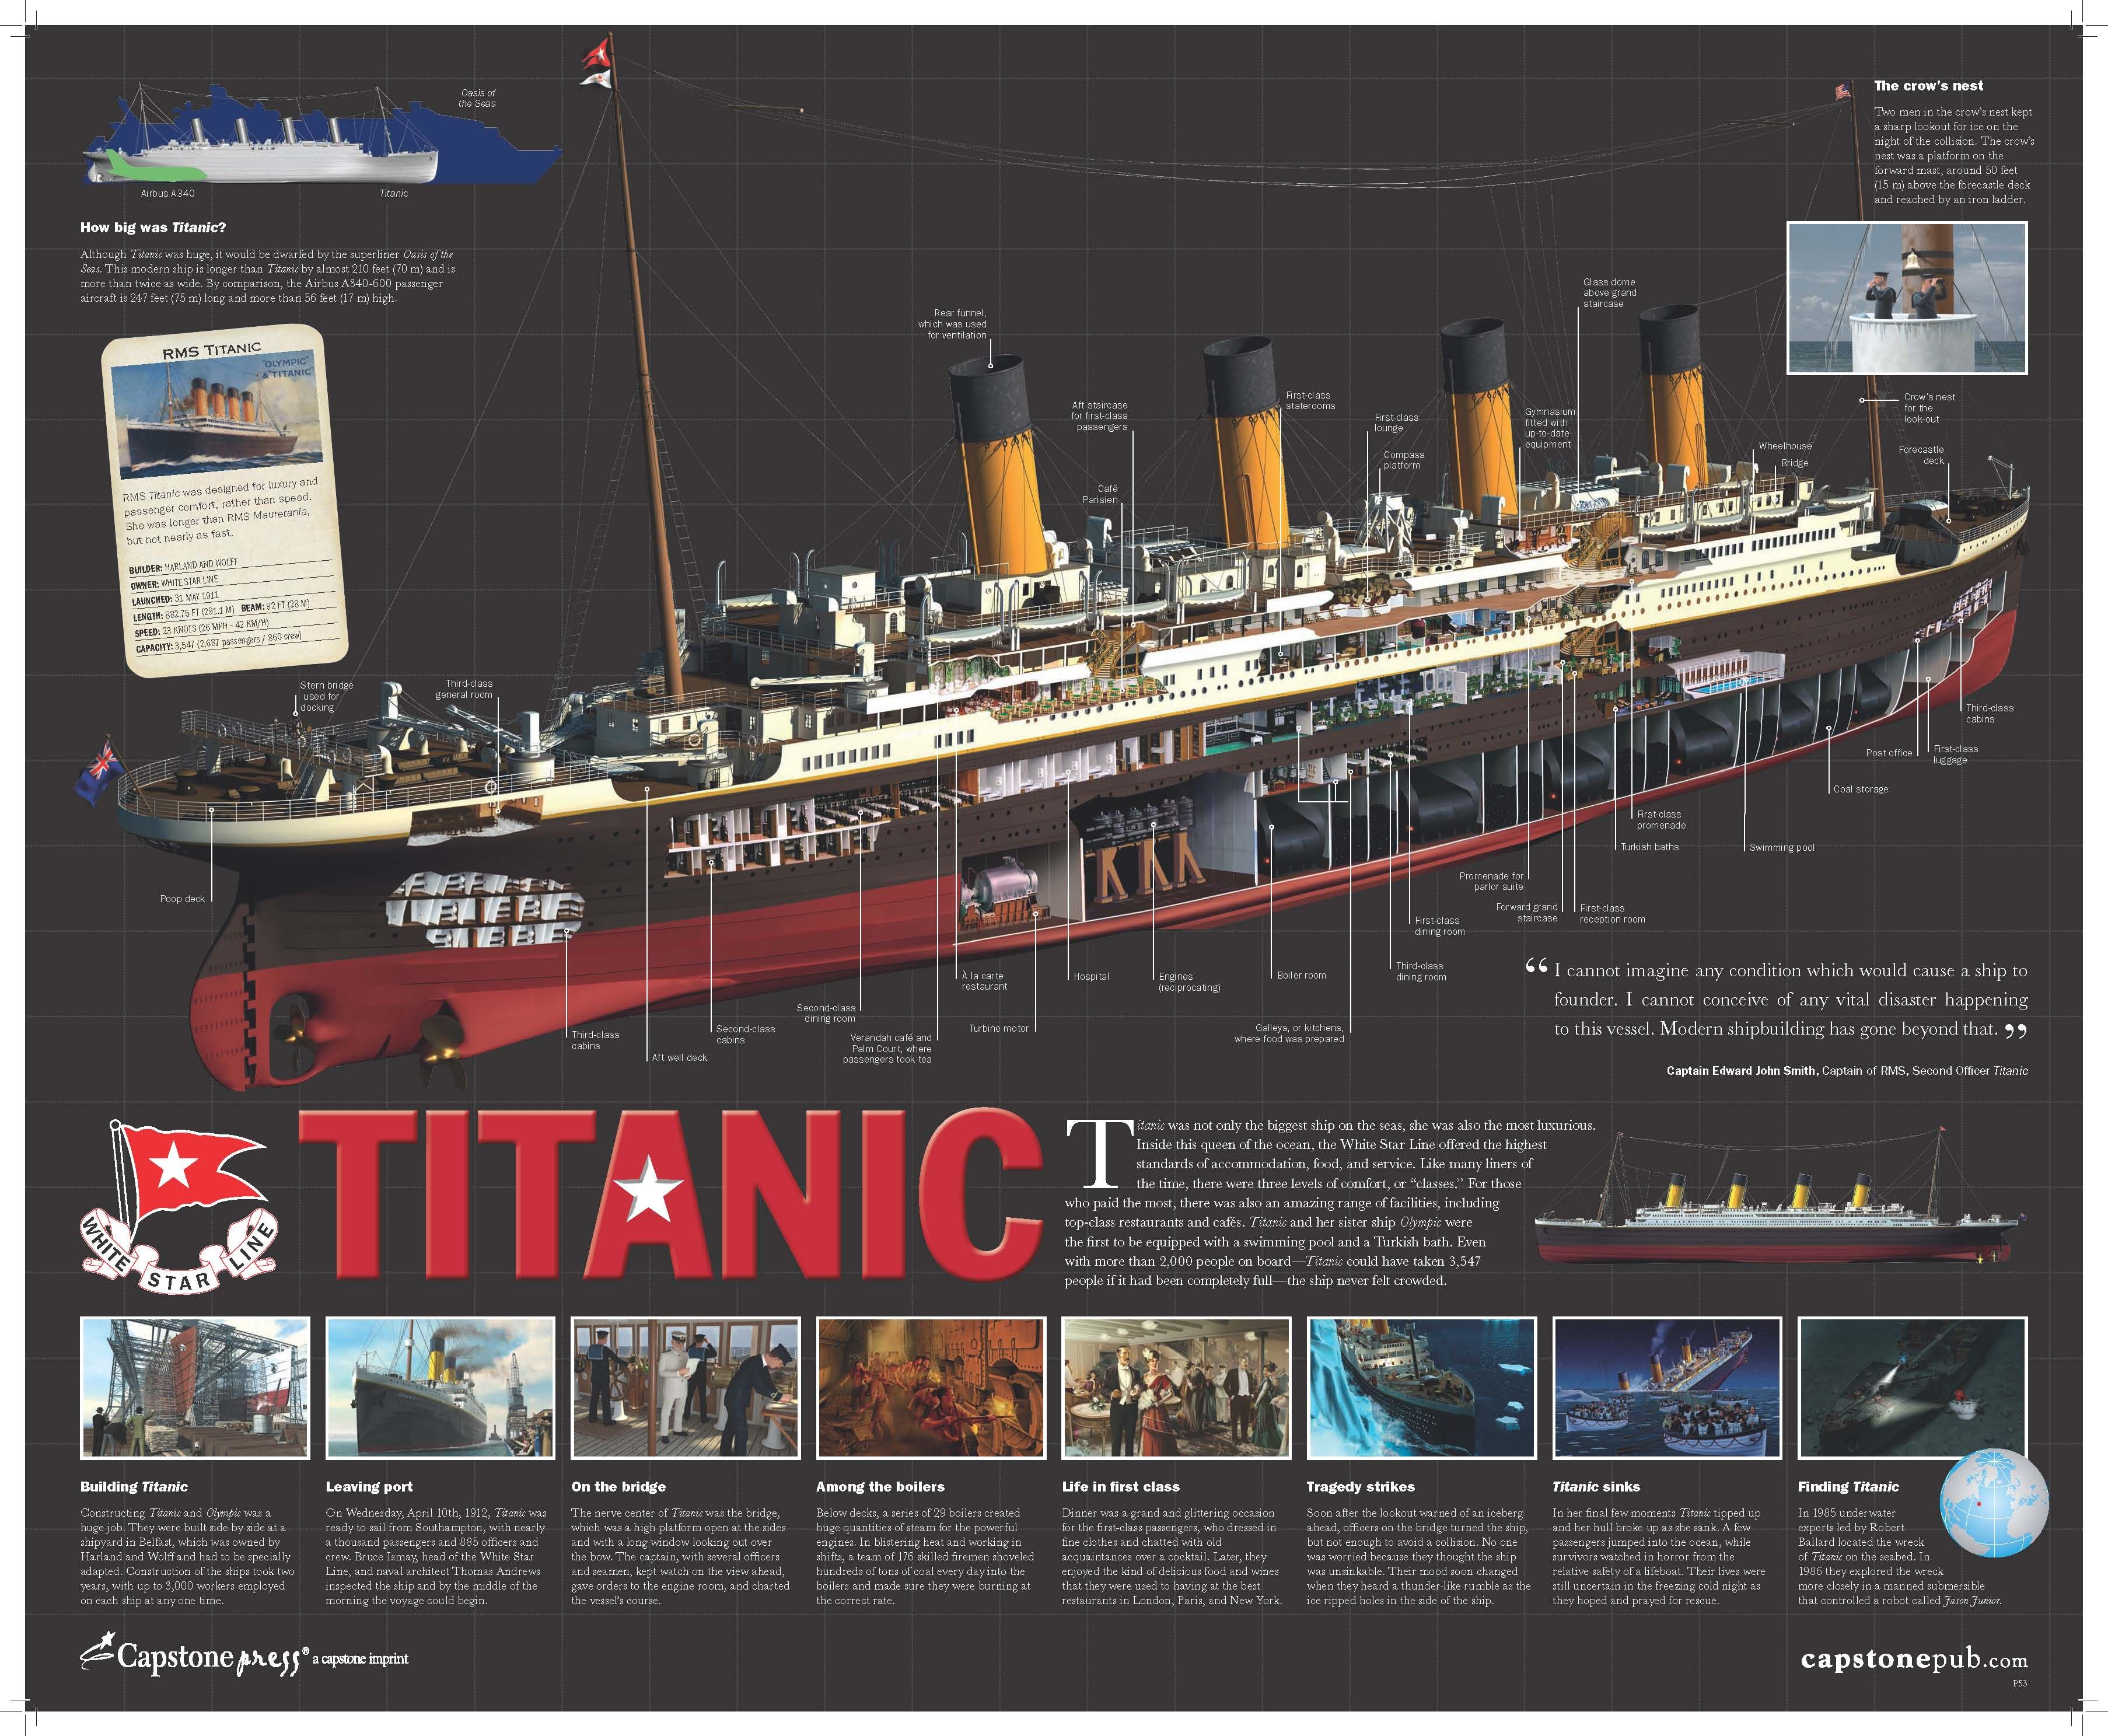

In [5]:
from IPython.display import Image, display

display(Image(filename="C:/Users/jwsam/Desktop/Titanic-Predictions Application/The Titanic from the inside1.jpg"))

## Setting up the library

In [6]:
# Setting up the libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Loading the data

In [7]:
train_pd=pd.read_csv("C:/Users/jwsam/Desktop/Titanic-Predictions Application/train.csv")
test_pd=pd.read_csv("C:/Users/jwsam/Desktop/Titanic-Predictions Application/test.csv")

In [8]:
train_pd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
train_pd.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Correlation Heatmap
To identify the features that are the most correlated with survival

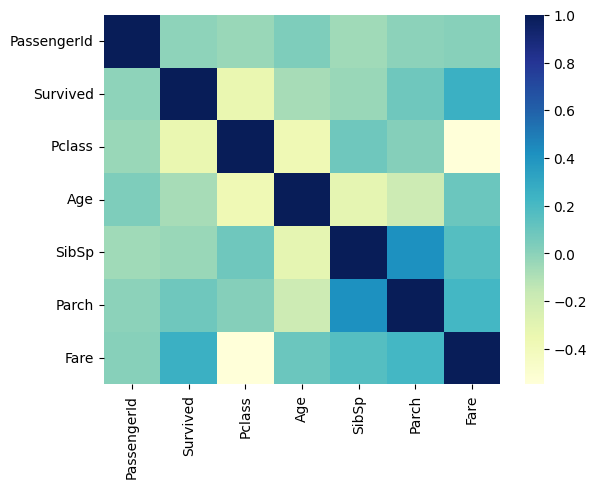

In [10]:
sns.heatmap(train_pd.select_dtypes(include='number').corr(), cmap="YlGnBu")
plt.show()

In [11]:
survived=train_pd['Survived']
train_pd=train_pd.drop(['Survived'],axis=1)

train_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Combining the data of both the Training and Testing datasets

In [12]:
train_idx=train_pd['PassengerId']
test_idx=test_pd['PassengerId']

combined_pd=pd.concat([train_pd,test_pd]).reset_index(drop=True)

combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Missing Values

In [13]:
print('Null Values:')
print(combined_pd.isnull().sum())

Null Values:
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


# Distributions layout to Estimate the Missing Values

### Age

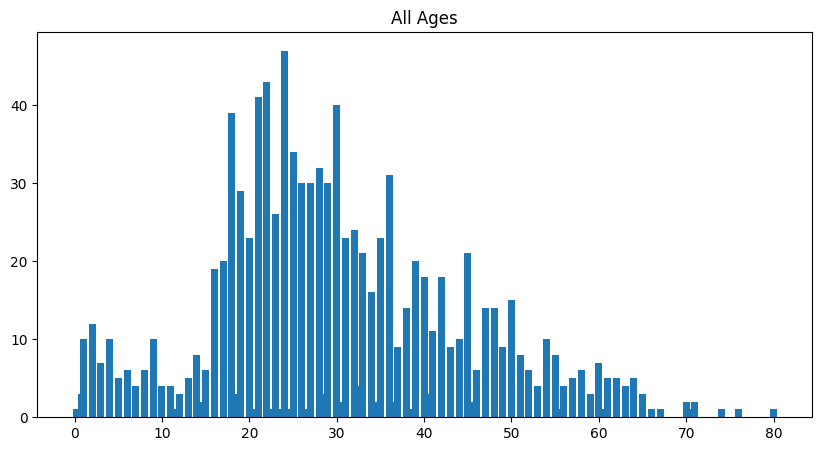

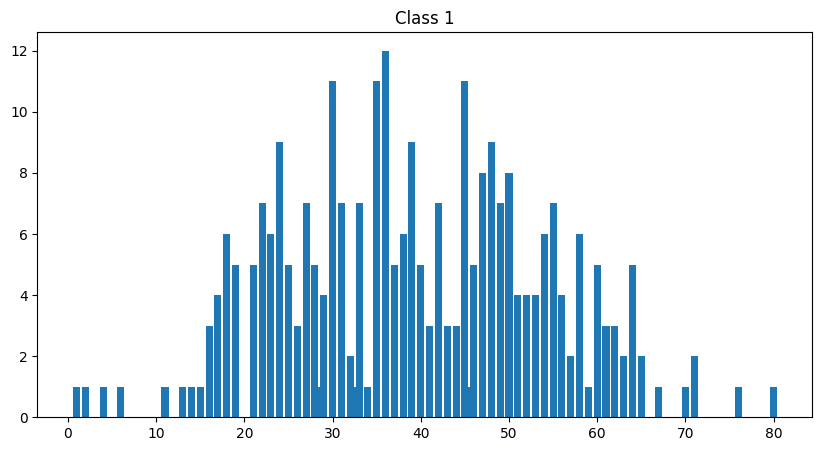

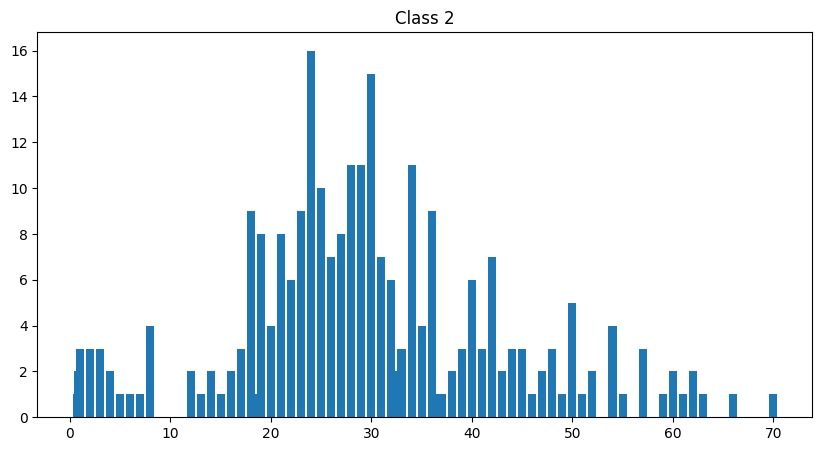

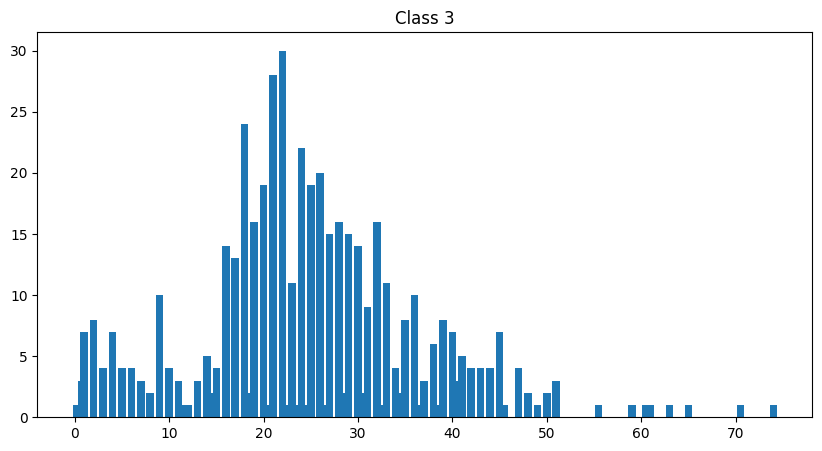

,Age
Pclass,
1,39.0
2,29.0
3,24.0


In [14]:
y= combined_pd['Age'].value_counts() 
x=y.index.values

plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.title('All Ages')
plt.show()

class_age=combined_pd[['Pclass','Age']]

for i in range(1,4): 
    plt.figure(figsize=(10,5))
    plt.title('Class '+ str(i))
    y=class_age[class_age['Pclass']==i]['Age'].value_counts()
    x=y.index.values
    plt.bar(x,y)
    plt.show()

medians=class_age.groupby('Pclass').median()
medians

### In order to fill the missing values in the age we had to look at the age distributions by ploting and analyzing the range and then picking a median for each class based on the data.

__The higher the Passenger class the lower the age get.__

## We used the **Medians** for each class

In [15]:
for i in range(3):
    idx=np.where((combined_pd['Pclass']==i+1) & (combined_pd['Age'].isnull()))[0]
    combined_pd.loc[idx,'Age']=medians.values[i][0]

combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


### The Fare

C:\Users\jwsam\AppData\Local\Temp\ipykernel_16996\2254425158.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_pd['Fare'].fillna(sim_fares.median(),inplace=True)


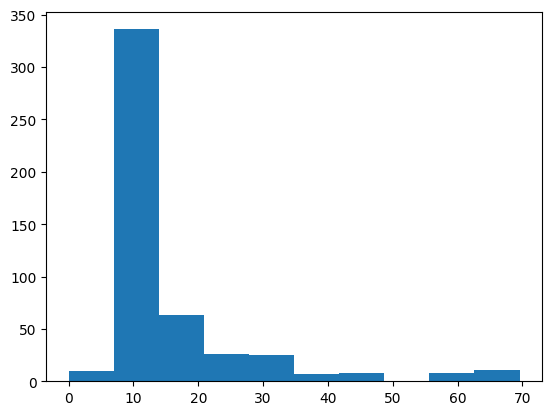

In [16]:
combined_pd[combined_pd['Fare'].isnull()]
sim_fares=combined_pd[(combined_pd['Pclass']==3) & (combined_pd['Embarked']=='S')]['Fare']
sim_fares.median()

plt.hist(sim_fares)
plt.plot()

combined_pd['Fare'].fillna(sim_fares.median(),inplace=True)

### Embarked Location

## The area Embarked was taken according to the _**Pclass and the Fare paid**._

In [17]:
display(combined_pd[combined_pd['Embarked'].isnull()])

#The area Embarked can be taken according to the Pclass and the Fare paid.
sim_emb=combined_pd[(combined_pd['Pclass']==1) & (combined_pd['Fare']>=70) & (combined_pd['Fare']<=90)]['Embarked']

print(sim_emb.value_counts())

combined_pd['Embarked'].fillna('C',inplace=True)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked
C    29
S    25
Q     3
Name: count, dtype: int64


C:\Users\jwsam\AppData\Local\Temp\ipykernel_16996\1860217741.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_pd['Embarked'].fillna('C',inplace=True)


### Cabin

In [18]:
print (combined_pd['Cabin'].value_counts())

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
                  ..
C39                1
B24                1
D40                1
D38                1
C105               1
Name: count, Length: 186, dtype: int64


In [19]:
print(combined_pd.loc[(combined_pd['Pclass']== 1)& (combined_pd['Cabin'].notna()),'Cabin'])

1        C85
3       C123
6        E46
11      C103
23        A6
        ... 
1291      C7
1295     D40
1298     C80
1302     C78
1305    C105
Name: Cabin, Length: 256, dtype: object


In [20]:
most_frequent_cabins = (
    combined_pd[combined_pd['Cabin'].notna()]
    .groupby('Pclass')['Cabin']
    .apply(lambda x: x.value_counts().head())
)

In [21]:
most_frequent_cabins

Pclass                 
1       C23 C25 C27        6
        B57 B59 B63 B66    5
        C22 C26            4
        C78                4
        B96 B98            4
2       F33                4
        F4                 4
        F2                 4
        D                  4
        E101               3
3       G6                 5
        F G73              2
        F G63              2
        E121               2
        F E69              1
Name: Cabin, dtype: int64

## The missing cabin values were replaced __with M and the values are standarized__


In [22]:
combined_pd['Cabin'].fillna('M',inplace=True)
combined_pd['Cabin']=combined_pd['Cabin'].str[0] #to take the first letter (C,B,M..)

print(combined_pd['Cabin'].value_counts())

idx=np.where(combined_pd['Cabin']=='T')[0]
combined_pd.loc[idx,'Cabin']='M'

Cabin
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


C:\Users\jwsam\AppData\Local\Temp\ipykernel_16996\345574939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_pd['Cabin'].fillna('M',inplace=True)


In [23]:
combined_pd.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Feature Enginnering

In [24]:
print(combined_pd.nunique()) #Number of unique values for each feature

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin             8
Embarked          3
dtype: int64


## Grouping titles

In [25]:
import numpy as np

last_names = []
titles = []
first_names = []

for full in combined_pd['Name'].fillna('').astype(str):
    # split last name
    if ',' in full:
        last, rest = full.split(',', 1)
        last_names.append(last.strip())
    else:
        last_names.append('')
        rest = full

    # split title and first names
    if '.' in rest:
        title, first = rest.split('.', 1)
        titles.append(title.strip())
        first_names.append(first.strip())
    else:
        titles.append('')
        first_names.append('')

last_names = np.array(last_names)
titles = np.array(titles)
first_names = np.array(first_names)



idx=np.where(np.isin(titles,['Capt','Col','Major']))
titles[idx]='Military'

idx=np.where(np.isin(titles,['Don','Dona','Jonkheer','Lady','Sir','Master','the Countess']))
titles[idx]='Nobility'

idx=np.where(np.isin(titles,['Miss','Ms','Mlle']))
titles[idx]='Ms'

idx=np.where(np.isin(titles,['Mrs','Mme']))
titles[idx]='Mrs'


print(np.unique(titles, return_counts=True))

combined_pd['Title']=titles
combined_pd

(array(['Dr', 'Military', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'],
      dtype='<U12'), array([  8,   7, 757, 198, 264,  67,   8]))


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr


In [26]:
print(combined_pd['Name'].head(8))

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
Name: Name, dtype: object


In [27]:
print(combined_pd['Age'].min(), combined_pd['Age'].max())
bins=np.array([0,10,20,30,40,50,60,70,80])
combined_pd['Age_Bin']=pd.cut(combined_pd['Age'],bins)
combined_pd

0.17 80.0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]"


In [28]:
ticket_dict=dict(combined_pd['Ticket'].value_counts())
combined_pd['tkt_count']=combined_pd['Ticket'].map(ticket_dict)
combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tkt_count
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1


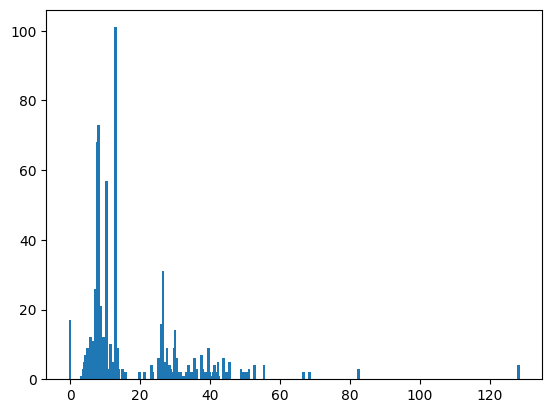

0.0 128.0823


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tkt_count,Fare_per_Ticket,Fare_Bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.250000,"(0, 20]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,35.641650,"(20, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.925000,"(0, 20]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.550000,"(20, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.050000,"(0, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3,36.300000,"(20, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1,7.250000,"(0, 20]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]"


In [29]:
combined_pd['Fare_per_Ticket']=combined_pd['Fare']/combined_pd['tkt_count']
plt.bar(combined_pd['Fare_per_Ticket'].value_counts().index.values,combined_pd['Fare_per_Ticket'].value_counts())
plt.show()
print(combined_pd['Fare_per_Ticket'].min(),combined_pd['Fare_per_Ticket'].max())
bins=[0,20,40,60,80,150]
combined_pd['Fare_Bin']=pd.cut(combined_pd['Fare_per_Ticket'],bins)
combined_pd

In [30]:
combined_pd['Num_Family']=combined_pd['SibSp']+combined_pd['Parch']+1 

In [31]:
combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tkt_count,Fare_per_Ticket,Fare_Bin,Num_Family
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.250000,"(0, 20]",2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,35.641650,"(20, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.925000,"(0, 20]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.550000,"(20, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.050000,"(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3,36.300000,"(20, 40]",1
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1,7.250000,"(0, 20]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]",1


In [32]:
combined_pd.drop(['Name','Age','Ticket','Fare','tkt_count','Fare_per_Ticket'],axis=1,inplace=True)
combined_pd

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,Num_Family
0,1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
1,2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
2,3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
3,4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
4,5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1
1305,1306,1,female,0,0,C,C,Nobility,"(30, 40]","(20, 40]",1
1306,1307,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
1307,1308,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1


### We combined all the values by their count then binned them in an interval for further usage 

In [33]:
combined_pd.nunique()

PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Parch             8
Cabin             8
Embarked          3
Title             7
Age_Bin           8
Fare_Bin          5
Num_Family        9
dtype: int64

 # Random Forest Classifier 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

## Indexing the PassengerId will prevent the model from taking it thus putting weights on an uneffective feature


In [35]:
combined_pd.set_index('PassengerId',inplace=True)

In [36]:
combined_pd

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,Num_Family
PassengerId,,,,,,,,,,
1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...
1305,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1
1306,1,female,0,0,C,C,Nobility,"(30, 40]","(20, 40]",1
1307,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1


## Label Encoding values

In [37]:
from sklearn.preprocessing import LabelEncoder
label_enc=combined_pd.copy()
label_enc=label_enc.astype(str)

label_enc=label_enc.apply(LabelEncoder().fit_transform)
display(label_enc)

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,Num_Family
PassengerId,,,,,,,,,,
1,2,1,1,0,7,2,2,2,0,2
2,0,0,1,0,2,0,3,3,1,2
3,2,0,0,0,7,2,4,2,0,0
4,0,0,1,0,2,2,3,3,1,2
5,2,1,0,0,7,2,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...
1305,2,1,0,0,7,2,2,2,0,0
1306,0,0,0,0,2,0,5,3,1,0
1307,2,1,0,0,7,2,2,3,0,0


# One Hot Encoding

In [38]:
one_hot=label_enc.copy()

one_hot=pd.get_dummies(one_hot,columns=['Sex','Embarked','Title'], dtype=int)
display(one_hot)

,Pclass,SibSp,Parch,Cabin,Age_Bin,Fare_Bin,Num_Family,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,2,1,0,7,2,0,2,0,1,0,0,1,0,0,1,0,0,0,0
2,0,1,0,2,3,1,2,1,0,1,0,0,0,0,0,1,0,0,0
3,2,0,0,7,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,1,0,2,3,1,2,1,0,0,0,1,0,0,0,1,0,0,0
5,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2,0,0,7,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1306,0,0,0,2,3,1,0,1,0,1,0,0,0,0,0,0,0,1,0
1307,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [162]:
X=one_hot.loc[train_idx].values
y=survived.values

scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.fit_transform(X)

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 19) (179, 19) (712,) (179,)


In [79]:
clf=RandomForestClassifier(random_state=0)
clf.fit(x_train,y_train).score(x_test,y_test)

0.7932960893854749

## SearchCV

In [82]:
params= {'criterion':['gini','entropy'],
         'n_estimators':[20,50,100,200,300,400,500,800,1000],
         'max_depth':np.arange(3,50),
         'min_samples_split':np.arange(1,1000),
         'max_features':['sqrt','log2'],
         'max_samples':np.linspace(0.1,0.9,10)}

rand_search=RandomizedSearchCV(RandomForestClassifier(random_state=0),params,scoring='accuracy',random_state=0, cv=5)
rand_search.fit(x_train,y_train)

rand_params=rand_search.best_params_
print(rand_params,'\n')
print('Train Acc:',rand_search.best_score_)
preds=rand_search.predict(x_test)
print('Test Acc:',accuracy_score(preds,y_test))

{'n_estimators': 200, 'min_samples_split': np.int64(16), 'max_samples': np.float64(0.6333333333333333), 'max_features': 'sqrt', 'max_depth': np.int64(49), 'criterion': 'gini'} 

Train Acc: 0.8286417807544568
Test Acc: 0.8324022346368715


## GridSearch

In [84]:
n_estimators=np.linspace(rand_params['n_estimators']-10,rand_params['n_estimators']+10, 3).astype(int)

min_samples_split=np.arange(rand_params['min_samples_split']-3, rand_params['min_samples_split']+3).astype(int)

max_samples=np.linspace(rand_params['max_samples']-.05,rand_params['max_samples']+.05,6)

max_depth=np.arange(rand_params['max_depth']-5,rand_params['max_depth']+5).astype(int)
max_depth = max_depth[max_depth > 0].astype(int)   

params= {'criterion':[rand_params['criterion']],
         'n_estimators':n_estimators,
         'max_depth':max_depth,
         'min_samples_split':min_samples_split,
         'max_features':[rand_params['max_features']],
         'max_samples':max_samples}

grid_search=GridSearchCV(RandomForestClassifier(random_state=0),params,scoring='accuracy', cv=5)
grid_search.fit(x_train,y_train)

grid_params=grid_search.best_params_
print(grid_params,'\n')
print('Train Acc:',grid_search.best_score_)
preds=grid_search.predict(x_test)
print('Test Acc:',accuracy_score(preds,y_test))

{'criterion': 'gini', 'max_depth': np.int64(44), 'max_features': 'sqrt', 'max_samples': np.float64(0.6233333333333333), 'min_samples_split': np.int64(14), 'n_estimators': np.int64(200)} 

Train Acc: 0.8356544863587118
Test Acc: 0.8212290502793296


## AdaBoost 

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
clf=AdaBoostClassifier(random_state=0)
clf.fit(x_train,y_train).score(x_test,y_test)

0.7988826815642458

In [91]:
params={'n_estimators':[50,100,200,300,400,500,800,100],
        'learning_rate':[1.0,0.1,0.01,0.001]}

rand_search=RandomizedSearchCV(AdaBoostClassifier(random_state=0),params,scoring='accuracy',random_state=0,cv=5)
rand_search.fit(x_train,y_train)

rand_params=rand_search.best_params_
print(rand_params,'\n')
print('Train Acc:',rand_search.best_score_)
preds=rand_search.predict(x_test)
print('Test Acc:',accuracy_score(preds,y_test))

{'n_estimators': 200, 'learning_rate': 1.0} 

Train Acc: 0.8258544272628778
Test Acc: 0.8100558659217877


In [94]:
n_estimators=np.linspace(rand_params['n_estimators']-50,rand_params['n_estimators']+50, 3).astype(int)

learning_rate=np.linspace(rand_params['learning_rate']*0.9,rand_params['learning_rate']*1.1,3)


params={'n_estimators':n_estimators,
        'learning_rate':learning_rate}

grid_search=GridSearchCV(AdaBoostClassifier(random_state=0),params,scoring='accuracy',cv=5)
grid_search.fit(x_train,y_train)

grid_params=grid_search.best_params_
print(grid_params,'\n')
print('Train Acc:',grid_search.best_score_)
preds=grid_search.predict(x_test)
print('Test Acc:',accuracy_score(preds,y_test))

{'learning_rate': np.float64(1.0), 'n_estimators': np.int64(250)} 

Train Acc: 0.8272628779671033
Test Acc: 0.8100558659217877


In [95]:
from sklearn.metrics import classification_report, confusion_matrix

preds = grid_search.predict(x_test)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


[[92 18]
 [16 53]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.75      0.77      0.76        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



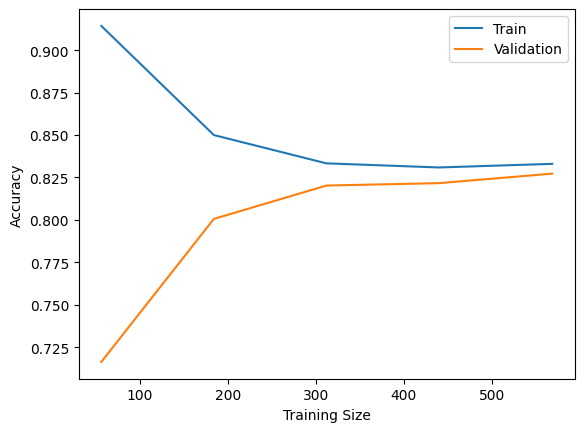

In [97]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, x_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


The data is suffient 

In [106]:
model = grid_search.best_estimator_ 

y_pred = model.predict(x_test)  


In [107]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [110]:
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

Test Accuracy: 0.8100558659217877
